# Pymaceuticals Inc.
---

### Analysis
##### Analysis can go here or at the bottom of the file.  I usually put it at the end.
1. There is a fairly stron correlation between mouse weight and tumor volume for Capomulin treatment. That is the greater the weight the higher the final tumor size.
2. Drug Ramicane results in the lowest average tumor size across all mice and signals that it might be the most effective treatmens across entire population
3. Infubinol treatment resulted in the lowest tumor size, which means that it potentially could cure the desease all together

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# nodups_data = combined_data.drop_duplicates(subset = "Mouse ID")

# display data
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(pd.unique(combined_data['Mouse ID']))

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),:]
display_dup_id = dup_id['Mouse ID'].unique()
display_dup_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),:]
dup_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)

clean_data = combined_data.loc[combined_data['Mouse ID'] != "g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_data['Mouse ID']))


248

## Summary Statistics

In [7]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

stats = pd.DataFrame(clean_data)
stats_mean = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
stats_median = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
stats_var = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stats_std = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stats_sem = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume": stats_mean,"Median Tumor Volume" : stats_median, 
                                "Tumor Volume Variance" : stats_var,"Tumor Volume Std. Dev." : stats_std,
                                "Tumor Volume Std. Err." : stats_var,})

summary_stats.head()



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,24.947764
Ceftamin,52.591172,51.776157,39.290177,6.268188,39.290177
Infubinol,52.884795,51.820584,43.128684,6.567243,43.128684
Ketapril,55.235638,53.698743,68.553577,8.279709,68.553577
Naftisol,54.331565,52.509285,66.173479,8.134708,66.173479


In [8]:
# Method 2:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using the aggregation method, produce the same summary statistics in a single line

stats2 = pd.DataFrame(clean_data)
stats2.groupby(stats2["Drug Regimen"]).agg({'Tumor Volume (mm3)' : ['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

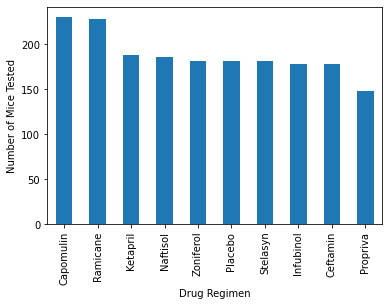

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# configuring the  bar gragh
bar1_data = clean_data["Drug Regimen"].value_counts()

bar1 = bar1_data.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested")

plt.show()

# bar1_data.head()

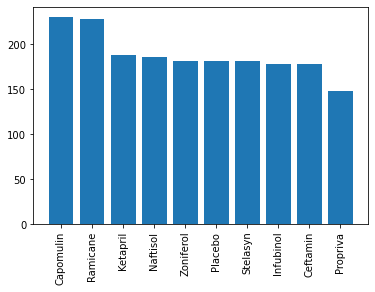

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

bar2_data = clean_data["Drug Regimen"].value_counts()
bar2_data.head()

plt.bar(bar2_data.index.values, bar2_data.values)
plt.xticks(rotation="vertical");


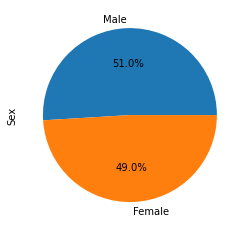

In [11]:
# Method1:  Generate a pie plot showing the distribution of female versus male mice using Pandas
# To clarify:  This answers the question:  of all the measurements taken, what percent where on male and female mice.
# This is different than:  of all the mice, what percent were male and female?

pie_data = clean_data["Sex"].value_counts()
pie_data = pie_data.plot(kind="pie", xlabel="Drug Regimen", ylabel="Sex",autopct="%1.1f%%")


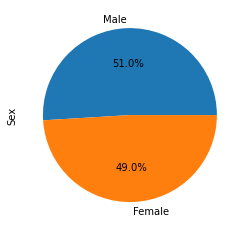

In [12]:
# Method 2:  Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
# Same clarification as above.

pie2_data = clean_data["Sex"].value_counts()
plt.ylabel("Sex")

plt.pie(pie2_data.values, labels = pie2_data.index.values, autopct="%1.1f%%");

## Quartiles, Outliers and Boxplots

 Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


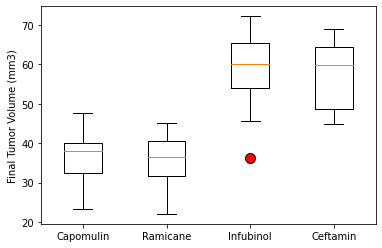

In [13]:
# max value per each mouse
max_value = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# merging the with original data
sorted_data = pd.merge(max_value, clean_data, on=['Mouse ID','Timepoint'],how='left')

#sorting on 4 specific treatment regimens
sorted_data = sorted_data.loc[(sorted_data['Drug Regimen'] == 'Capomulin') | (sorted_data['Drug Regimen'] == 'Ramicane') |
                                (sorted_data['Drug Regimen'] == 'Infubinol') | (sorted_data['Drug Regimen'] == 'Ceftamin')]

# keeping only relevant colmns
final_data = sorted_data[["Mouse ID", "Drug Regimen","Tumor Volume (mm3)"]]


# create a list of treatments for analysis
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# setting up a loop to go through each treatment analysis in the data to create a new list
# that shows upper and lowe quartiles, and poptential outliers then prints values 

# new list 
final_list = []

#  loop
for treatment in treatment_list:
    tumor_vol = final_data.loc[final_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    final_list.append(tumor_vol)
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f" {treatment}'s potential outliers: {outliers}")   


#generating blox-plot and formatting
red_dot = dict(markerfacecolor='red', markersize=10)
plt.boxplot(final_list, labels=treatment_list,flierprops=red_dot)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()
    

## Line and Scatter Plots

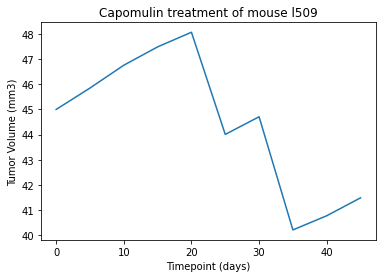

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# filtering data on specific mouse ID "l509" and creating series for x and y labes
mouse_data_vol = combined_data.loc[combined_data['Mouse ID']== "l509"]['Tumor Volume (mm3)']
mouse_data_time = combined_data.loc[combined_data['Mouse ID']== "l509"]['Timepoint']


# plot the graph and name assign labels
plt.plot(mouse_data_time, mouse_data_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')

plt.show()


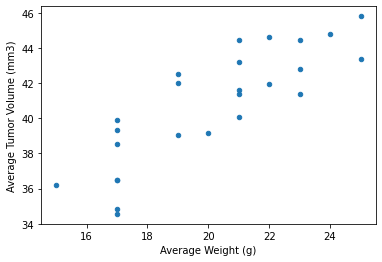

In [15]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen
# The chart below shows a dot for each mouse treated with Capomulin using average weight and average tumor Volume.
#  I would make the X-label say something like "Average Weight (g)"

regimen_data = combined_data.loc[combined_data['Drug Regimen']== "Capomulin"] \
                .groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']].mean()

regimen_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", xlabel="Average Weight (g)", 
                  ylabel ="Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


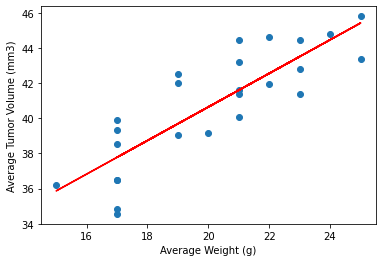

In [16]:
#calculation the correlation and plotting it
x_values = regimen_data['Weight (g)']
y_values = regimen_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is: {round(rvalue**1,2)}")

plt.show()